In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
def font_size(s=22):
    font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : s}

    matplotlib.rc('font', **font)

In [23]:
fname = 'counts_by_gender_year_authcount.csv'  # All papers here have >= 3 authors
d = pd.read_csv(fname, encoding='utf-8')
d.head()

,year,count_authorships,auth_count,author_gender,sequence
0,1980,2,2,female,0
1,1980,4,2,female,1
2,1980,7,2,female,2
3,1980,180,2,male,0
4,1980,174,2,male,1


In [24]:
# Get sum of authorships counts for all auth_count papers, by year.
# Do this separately for each gender and authorship sequence (1st vs 2nd author)

# Female
female_firsts = d[(d.author_gender == 'female') & (d.sequence == 0)]
female_firsts = female_firsts[['year', 'count_authorships']].groupby('year').sum()

female_seconds = d[(d.author_gender == 'female') & (d.sequence == 1)]
female_seconds = female_seconds[['year', 'count_authorships']].groupby('year').sum()

female = female_firsts.join(female_seconds, rsuffix='_2nd', lsuffix='_1st')

# Male
male_firsts = d[(d.author_gender == 'male') & (d.sequence == 0)]
male_firsts = male_firsts[['year', 'count_authorships']].groupby('year').sum()

male_seconds = d[(d.author_gender == 'male') & (d.sequence == 1)]
male_seconds = male_seconds[['year', 'count_authorships']].groupby('year').sum()

male = male_firsts.join(male_seconds, rsuffix='_2nd', lsuffix='_1st')

In [28]:
# Get proportions of first:sum(1st + 2nd) authorships

# Female
female['totals'] = female.count_authorships_1st + female.count_authorships_2nd

female['female_first_prop'] = female.count_authorships_1st / female.totals
numerator = (female['female_first_prop']*(1-female['female_first_prop']))
female['female_first_prop_error'] = 1.96*(np.sqrt(numerator/female.totals))
female['female_first_prop_max_estimate'] = female['female_first_prop'] + female['female_first_prop_error']
female['female_first_prop_min_estimate'] = female['female_first_prop'] - female['female_first_prop_error']
n_female = female['totals'].sum()

# Male
male['totals'] = male.count_authorships_1st + male.count_authorships_2nd

male['male_first_prop'] = male.count_authorships_1st / male.totals
numerator = (male['male_first_prop']*(1-male['male_first_prop']))
male['male_first_prop_error'] = 1.96*(np.sqrt(numerator/male.totals))
male['male_first_prop_max_estimate'] = male['male_first_prop'] + male['male_first_prop_error']
male['male_first_prop_min_estimate'] = male['male_first_prop'] - male['male_first_prop_error']
n_male = male['totals'].sum()

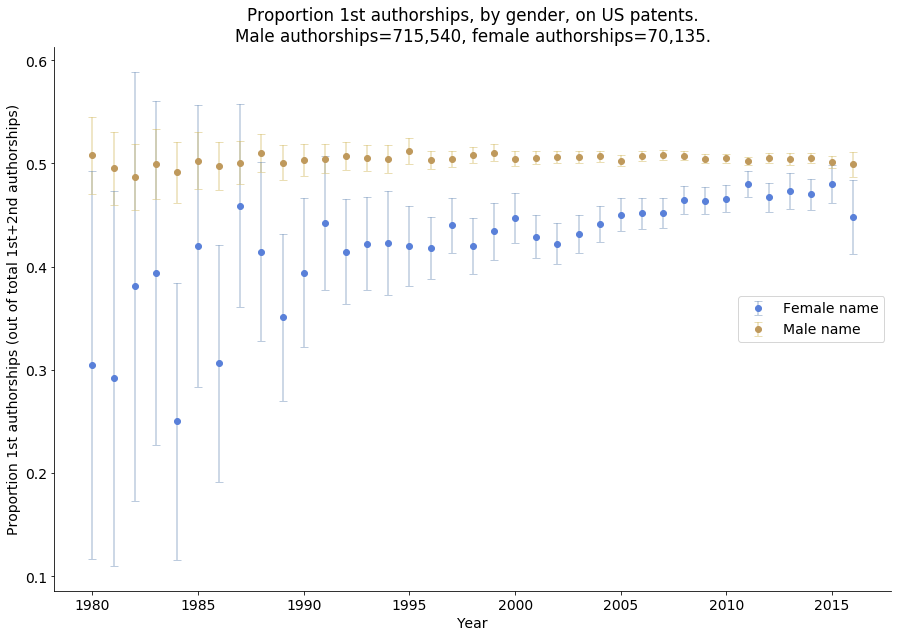

In [34]:
plt.figure(figsize=(15,10))
font_size(14)

# Female
plt.errorbar(x=female.index, y=female.female_first_prop, yerr=female.female_first_prop_error, fmt='o', label='Female name',
            ecolor=[.48, .6, .75,.5], color=[.35, .5, .85,1], capsize=4)
# Male
plt.errorbar(x=male.index, y=male.male_first_prop, yerr=male.male_first_prop_error, fmt='o', label='Male name',
            ecolor=[.84,.75, .42, .5], color=[.75,.6, .36, 1], capsize=4)

plt.legend(loc=5)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Year')
plt.ylabel('Proportion 1st authorships (out of total 1st+2nd authorships)')
title_base = "Proportion 1st authorships, by gender, on US patents.\nMale authorships={:,}, female authorships={:,}."
plt.title(title_base.format(n_male, n_female), color='black')
plt.savefig('/Users/ilya/code/publishing_biases/analyze/analyses/patent/prop_1st_authorships.png',
           dpi=400)